#Atividade
 
 
*   Análise do dataset ABALONE do repositório UCI. Link para download dos dados: https://datahub.io/machine-learning/abalone/r/abalone.csv

*   Todos os itens devem incluir no mínimo uma comparação antes/depois (por exemplo, avaliar o resultado entre dois algoritmos ou entre duas técnicas de validação cruzada ou entre dois algoritmos de classificação ou agrupamento ou entre diferentes parâmetros de um mesmo algoritmo).

1) Apresente uma descrição dos dados brutos e faça uma análise prévia de forma gráfica e de forma numérica.

2) Aplicar um algoritmo de transformação de espaço: comparar antes e depois usando matriz de covariância, correlação, entropia.

3) Aplicar um algoritmo de redução de dimensionalidade: comparar métricas de classificação antes e depois usando.

4) Para todas as atividades, apresente os resultados na forma gráfica e em tabelas. 

5) Comente todos os passos e explique suas observações: por exemplo: comente sobre como o desbalanceamento das classes, a dimensão do vetor de atributos e a quantidade de amostras influenciaram nos resultados de cada item; compare os resultados entre os itens 2 e 3. Todos os comentários devem estar embasados em gráficos e tabelas

#### 1.   *Importações dos módulos gerais e funções* 

    * Aqui serão importados o numpy, o pandas e o matplotlib/seaborn para plots




In [50]:
# This is not strictly for a Python rather. 
%matplotlib inline

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
sns.set()                         #Configura os plots do matplotlib para terem os mesmos estilos do seaborn
sns.set_style("whitegrid")        #Alterando o estilo do plot para melhor vizualização no colab (Tema escuro fica ruim de ver o fundo)

    *  Aqui serão importados os módulos do sklearn para realizar os algoritmos K-Nearest Neighbors e Random Forest

In [52]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import RandomForestClassifier 
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV

#### 2.   Leitura dos Datasets
      *   O dataset "Abalone"
      *   Este dataset se trata do estudo de um gênero de moluscos chamado haliotis (ou abalone em inglês)
      *   O dataset pode ser utilizado tanto para classificação ou regressão
      *   Classificação: para definição do sexo do haliotis e do número de aneis
      *   Regressão: para descobrir o número de aneis

In [53]:
data = pd.read_csv('https://datahub.io/machine-learning/abalone/r/abalone.csv')
data.rename(columns = {"Class_number_of_rings" : "Rings"}, inplace = True)
data

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


#### 3.   Tratamento dos dados

Primeiro se verifica se existem dados faltantes

In [54]:
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

Apesar de não haverem dados faltantes no dataset, existem dados inconsistentes. O atributo "Height" possui dois valores iguais a 0.

In [55]:
data[data["Height"] == 0]

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


Esses valores serão transformados em dados faltantes (np.nan = NaN). Isto se dá pela facilidade de tratar dados faltantes.


In [56]:
data["Height"] = data["Height"].replace({0:np.nan})
data.fillna(data.mean(), inplace= True)

In [57]:
data[data["Height"] == 0]

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings


In [58]:
data.iloc[3996]

Sex                      I
Length               0.315
Diameter              0.23
Height            0.139583
Whole_weight         0.134
Shucked_weight      0.0575
Viscera_weight      0.0285
Shell_weight        0.3505
Rings                    6
Name: 3996, dtype: object

Agora que os dados foram tratados, será realizado o "one-hot encoding" nos dados. Isto serve para não colocar um grau de importância entre os dados categoricos. O lado negativo é que o dataset irá aumentar de dimensão onde o parâmetro "Sex" será dividido em 3 novos parâmetros: "Sex_F", "Sex_I" e "Sex_M" (o parâmetro "Sex" deixa de existir)

In [59]:
data_dummy = pd.get_dummies(data)
data_dummy

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1,0,0


#### 4.   Gráficos dos dados inalterados

    * Contabilização das classes

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Abalone dataset: Rings')

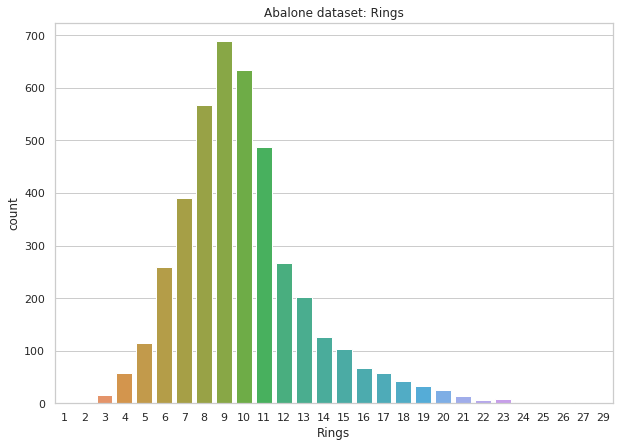

In [60]:
plt.figure(figsize = (10,7))
sns.countplot(data['Rings']).set_title("Abalone dataset: Rings")

In [61]:
data['Rings'].value_counts().sort_index()

1       1
2       1
3      15
4      57
5     115
6     259
7     391
8     568
9     689
10    634
11    487
12    267
13    203
14    126
15    103
16     67
17     58
18     42
19     32
20     26
21     14
22      6
23      9
24      2
25      1
26      1
27      2
29      1
Name: Rings, dtype: int64

O dataset possui classes altamente desbalanceadas, isso significa que classes com menores números de observações estarão sujeitas a serem classificadas erradas. Percebe-se que a maioria das observações se encontram na área central do 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Abalone dataset: Sex')

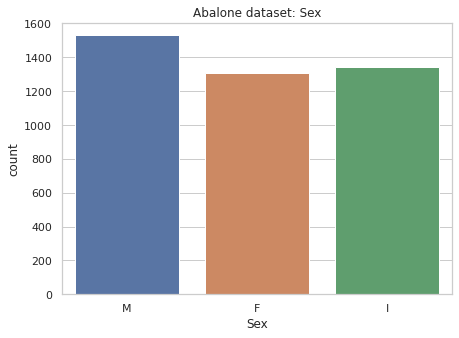

In [62]:
plt.figure(figsize = (7,5))
sns.countplot(data["Sex"]).set_title("Abalone dataset: Sex")

In [63]:
data['Sex'].value_counts().sort_index()

F    1307
I    1342
M    1528
Name: Sex, dtype: int64

Este gráfico serve para mostrar a distribuição dos sexos dos haliotes. Percebe-se que apesar de serem classes desbalanceadas, elas estão bem proximas em proporção.

In [64]:
data.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139583,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041715,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.010000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


Aqui podemos ver certas caracteristicas do dataset como o atributo "Height" não ter mais o minimo igual a 0 devido ao tratamento feito anteriormente e que a informação "Sex" está concentrada no ultimo percentil (75%).

    * Cálculo e plot da matriz de correlação

Text(0.5, 1.0, 'Matriz de correlação do Abalone')

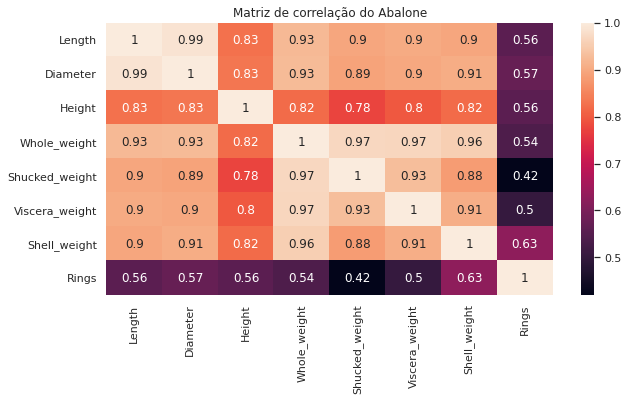

In [65]:
plt.figure(figsize = (10,5))
sns.heatmap(data_dummy.iloc[:,:8].corr(), color = 'k', annot = True).set_title("Matriz de correlação do Abalone")

É possivel ver que os dados numéricos possuem alta correlação positiva entre sim (com exceção do do Rings que possui correlação mediana com todos os outros atributos)

    * Pairplot do dataset para melhor visualização das caracteristicas de correlação

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

Text(0.475, 1.01, 'Pairplot do dataset Abalone')

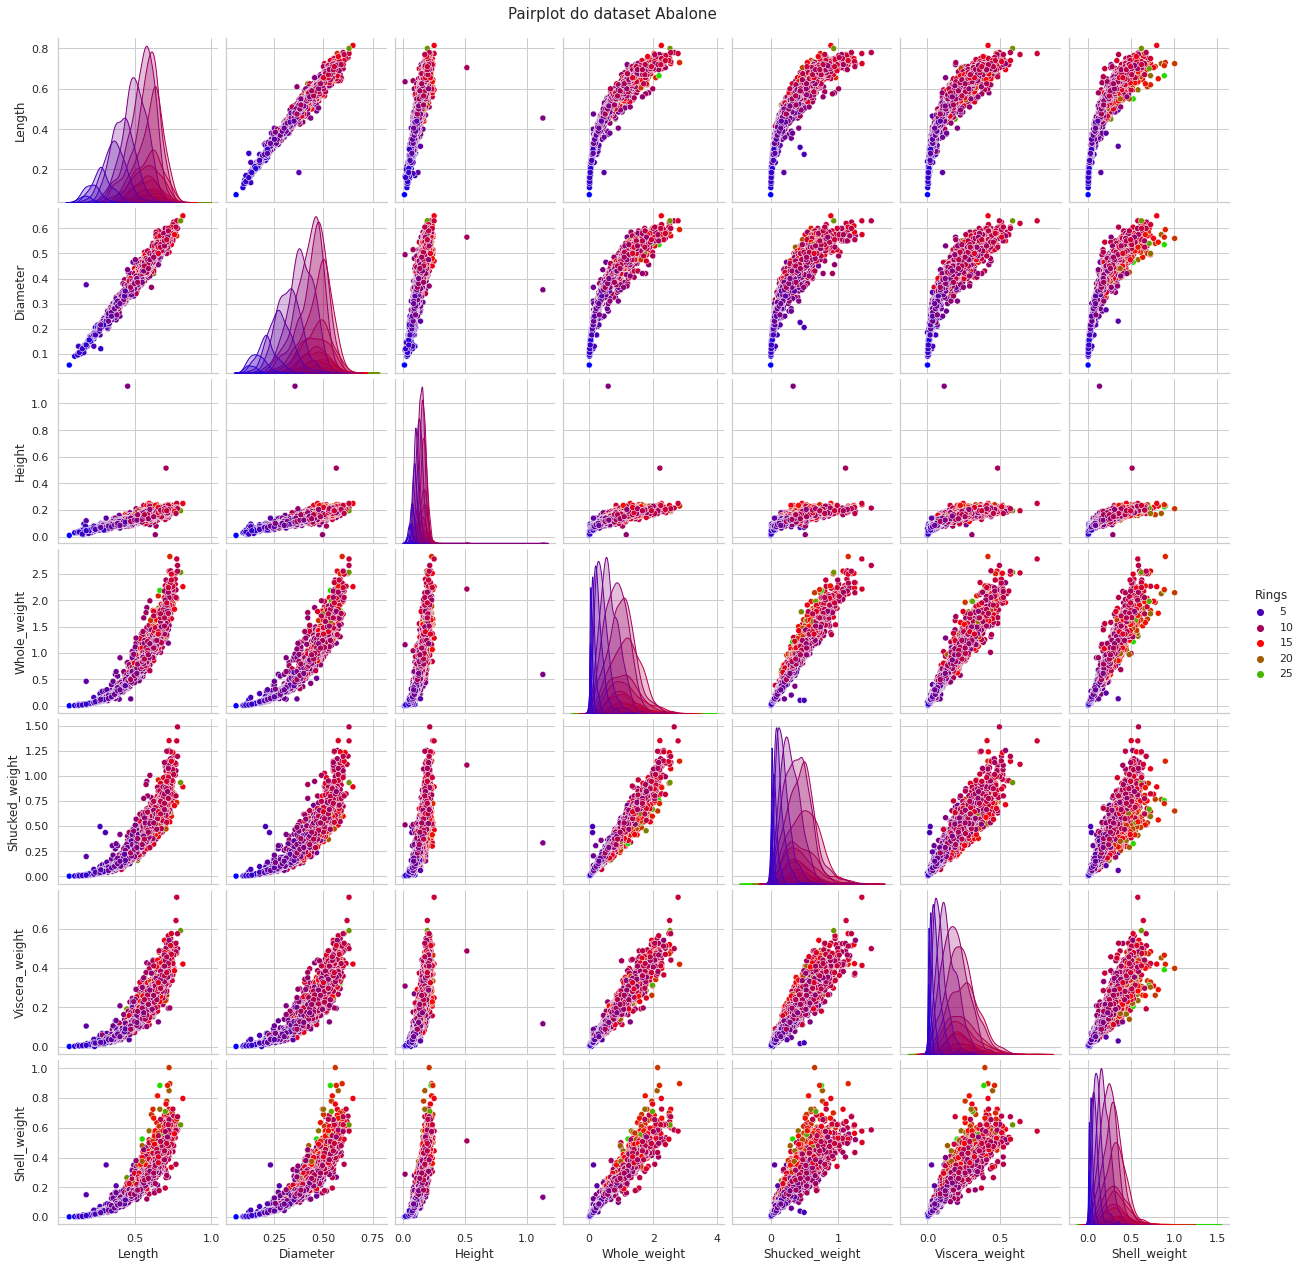

In [66]:
pair_plot = sns.pairplot(data.iloc[:, :9], hue = "Rings", palette = "brg")
pair_plot.fig.suptitle("Pairplot do dataset Abalone", fontsize = 15, x = 0.475, y = 1.01)

Aqui podemos ver as relações mostradas na matriz de correlação. Pode-se observar que alguns parametros mostram comportamentos exponenciais como mostrado nos parâmetros "Length" e ""Shucked_weight".

#### 5. Transformação do espaço

Primeiramente será separado os dados em "feature" e "target"

In [67]:
feature = data_dummy.drop("Rings", axis = 1).values
target = data_dummy["Rings"].values

Agora será feito a normalização das "features" utilizando o "MinMaxScaler". Este algoritmo serve para normalizar os dados numéricos em um intervalo de 0 a 1.

In [68]:
standard_scaler = MinMaxScaler()
scaler = standard_scaler.fit_transform(feature)
scaler_data = pd.DataFrame(scaler, columns = ["Length","Diameter","Height","Whole_weight","Shucked_weight","Viscera_weight","Shell_weight","Sex_F","Sex_I","Sex_M"])
scaler_data["Rings"] = data["Rings"]
scaler_data

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_F,Sex_I,Sex_M,Rings
0,0.513514,0.521008,0.075893,0.181335,0.150303,0.132324,0.147982,0.0,0.0,1.0,15
1,0.371622,0.352941,0.071429,0.079157,0.066241,0.063199,0.068261,0.0,0.0,1.0,7
2,0.614865,0.613445,0.111607,0.239065,0.171822,0.185648,0.207773,1.0,0.0,0.0,9
3,0.493243,0.521008,0.102679,0.182044,0.144250,0.149440,0.152965,0.0,0.0,1.0,10
4,0.344595,0.336134,0.062500,0.071897,0.059516,0.051350,0.053313,0.0,1.0,0.0,7
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.662162,0.663866,0.138393,0.313441,0.248151,0.314022,0.246637,1.0,0.0,0.0,11
4173,0.695946,0.647059,0.111607,0.341420,0.294553,0.281764,0.258097,0.0,0.0,1.0,10
4174,0.709459,0.705882,0.174107,0.415796,0.352724,0.377880,0.305431,0.0,0.0,1.0,9
4175,0.743243,0.722689,0.125000,0.386931,0.356422,0.342989,0.293473,1.0,0.0,0.0,10


Agora se realiza a transformação do espaço com o PCA do sklearn

In [69]:
pca = PCA()
columns = ["PCA1", "PCA2", "PCA3", "PCA4", "PCA5", "PCA6", "PCA7", "PCA8", "PCA9", "PCA10"]
data_transformed_full = pca.fit_transform(scaler_data.iloc[:, :10].values)
data_transformed_full = pd.DataFrame(data_transformed_full, columns = columns)
data_transformed_full["Outcome"] = data["Rings"]
data_transformed_full.iloc[:, :10]

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10
0,-0.386968,-0.620373,-0.349255,-0.026546,-0.007181,0.014355,-0.017782,0.019909,-0.002316,4.456236e-15
1,-0.274036,-0.655727,-0.588019,0.045738,0.000414,0.005787,-0.002760,-0.000930,0.001228,1.536947e-15
2,-0.165900,0.784011,-0.270315,-0.073370,0.005740,0.002569,-0.003564,0.006216,-0.007028,-8.699609e-16
3,-0.387004,-0.620319,-0.349656,-0.012712,0.003478,-0.001411,0.011775,0.026931,0.000257,-5.703916e-16
4,0.966870,-0.170094,-0.113056,0.055237,0.001089,0.003704,-0.001635,0.011265,-0.004413,-1.277975e-15
...,...,...,...,...,...,...,...,...,...,...
4172,-0.237586,0.806092,-0.118244,-0.027463,-0.017635,-0.051526,0.013813,0.007353,0.007432,-1.492556e-16
4173,-0.538675,-0.573368,-0.027153,-0.025621,-0.027077,-0.003681,-0.020534,-0.020454,0.000180,-7.269788e-17
4174,-0.600483,-0.554269,0.103364,0.015843,-0.023443,-0.037319,0.038721,-0.001991,0.002946,-1.126427e-16
4175,-0.305644,0.826821,0.027626,-0.022271,-0.050245,-0.006006,-0.012680,-0.002205,0.016057,3.593217e-17


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

Text(0.475, 1.01, 'Pairplot do dataset Abalone após aplicação do PCA')

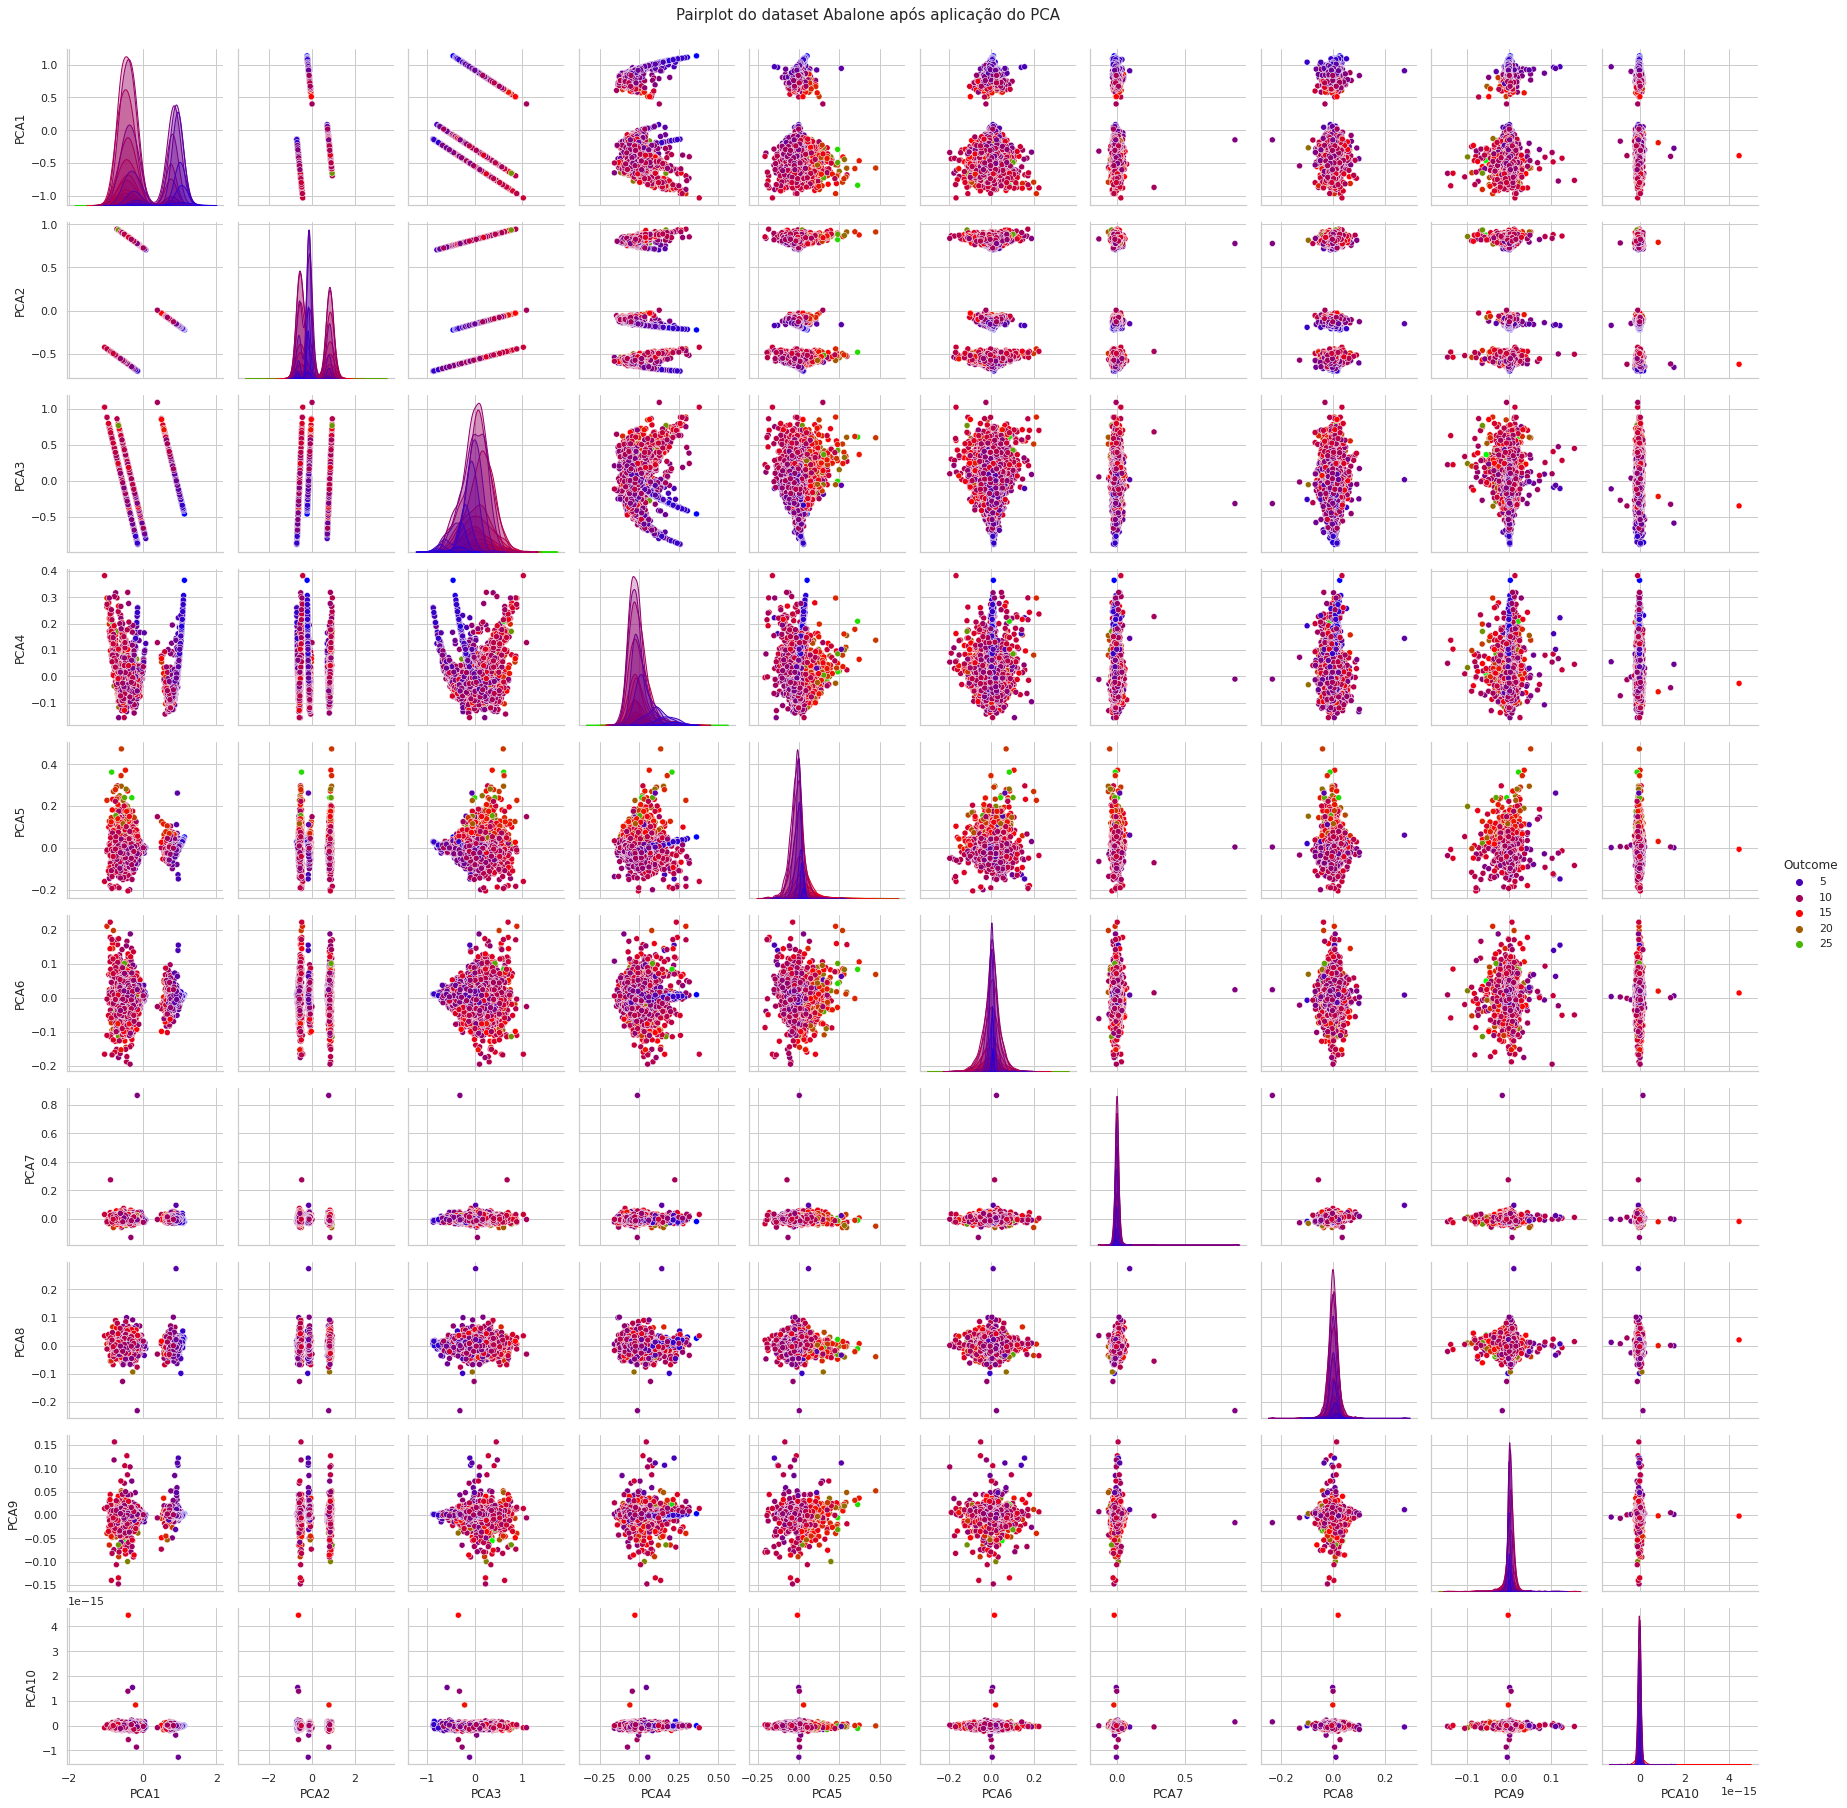

In [70]:
pair_plot = sns.pairplot(data_transformed_full, hue = "Outcome", palette = "brg")
pair_plot.fig.suptitle("Pairplot do dataset Abalone após aplicação do PCA", fontsize = 15, x = 0.475, y = 1.01)

#### 6. Correlação, covariância e entropia

Aqui são mostrados as matrizes de covariância e de correlação e a entropia.

Text(0.5, 1.0, 'Matriz de correlação do Abalone')

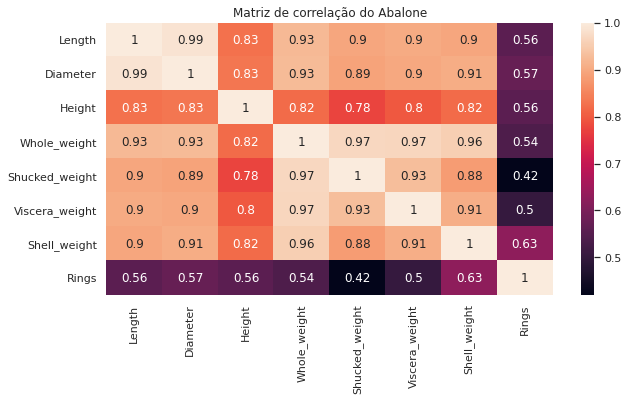

In [71]:
plt.figure(figsize = (10,5))
sns.heatmap(scaler_data.drop(["Sex_F","Sex_I","Sex_M"], axis = 1).corr(), color = 'k', annot = True).set_title("Matriz de correlação do Abalone")

Text(0.5, 1.0, 'Matriz de covariância do Abalone')

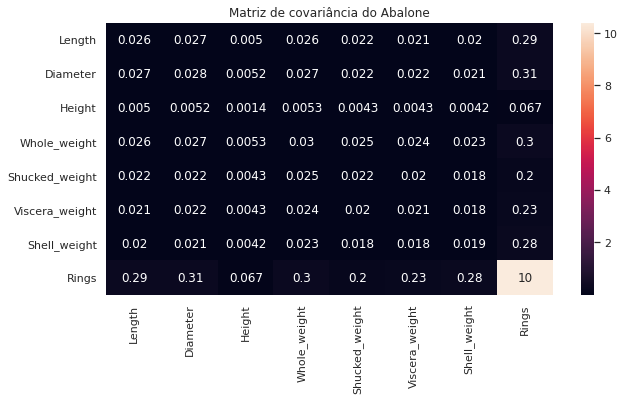

In [72]:
plt.figure(figsize = (10,5))
sns.heatmap(scaler_data.drop(["Sex_F","Sex_I","Sex_M"], axis = 1).cov(), color = 'k', annot = True).set_title("Matriz de covariância do Abalone")

In [73]:
print('Entropia')
H1 = []
for i in range(10):
  p, bin_edges = np.histogram(scaler_data.iloc[:,i], density=True)
  H1.append(-np.sum(p*np.log2(p+1e-6)))
print(H1)
print(len(H1))

Entropia
[-6.383570341086865, -5.992374523323264, -23.86262137376522, -5.753152870602948, -8.179103218483654, -8.484033408839121, -8.923028678740192, -24.25431149517934, -24.16156929033604, -23.745256881555154]
10


#### 7. Correlação, covariância e entropia dos dados transformados

Aqui são mostrados as matrizes de covariância e de correlação e a entropia após a realização do PCA, além do resultado da diferença de entropia entre antes e depois.

Text(0.5, 1.0, 'Matriz de correlação do Abalone Transformado')

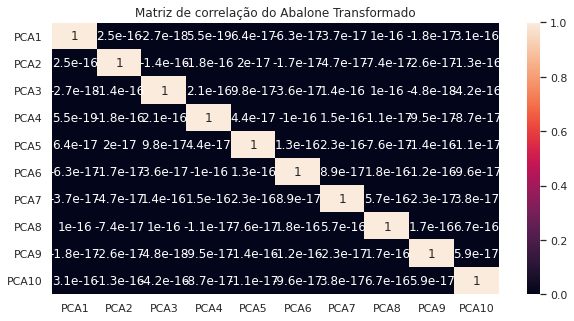

In [74]:
plt.figure(figsize = (10,5))
sns.heatmap(data_transformed_full.drop(["Outcome"], axis = 1).corr(), color = 'k', annot = True).set_title("Matriz de correlação do Abalone Transformado")

Aqui percebe-se que os dados são altamente descorrelacionados (como mostrado no pairplot dos dados descorrelacionados)

Text(0.5, 1.0, 'Matriz de covariância do Abalone Transformado')

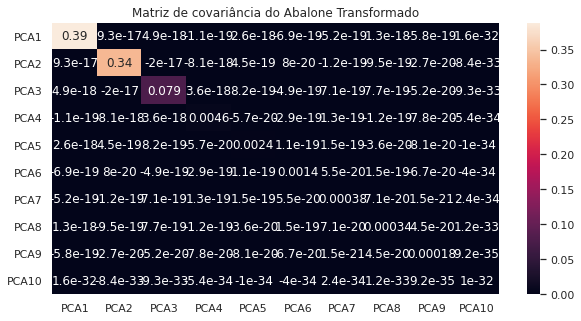

In [75]:
plt.figure(figsize = (10,5))
sns.heatmap(data_transformed_full.drop(["Outcome"], axis = 1).cov(), color = 'k', annot = True).set_title("Matriz de covariância do Abalone Transformado")

In [76]:
print('Entropia do abalone Transformado')
H2 = []
for i in range(10):
  p, bin_edges = np.histogram(data_transformed_full.iloc[:,i], density=True)
  H2.append(-np.sum(p*np.log2(p+1e-6)))
print(H2)
print(len(H2))

Entropia do abalone Transformado
[1.9441175374722768, -3.083711860342072, 1.2037416818598665, -36.81903986214272, -33.24308034512607, -65.74023306868853, -32.30072468264428, -71.17974779701726, -129.84849696418715, -8.78775678105684e+16]
10


In [77]:
H3 = [(H1[i] - H2[i])  for i in range(len(H1))]
entropy = pd.DataFrame({"Entropia: Normal": H1, "Entropia: PCA": H2, "Diferença": H3})
entropy.style.format("{:.1f}")

,Entropia: Normal,Entropia: PCA,Diferença
0,-6.4,1.9,-8.3
1,-6.0,-3.1,-2.9
2,-23.9,1.2,-25.1
3,-5.8,-36.8,31.1
4,-8.2,-33.2,25.1
5,-8.5,-65.7,57.3
6,-8.9,-32.3,23.4
7,-24.3,-71.2,46.9
8,-24.2,-129.8,105.7
9,-23.7,-87877567810568400.0,87877567810568384.0


#### 8. Redução dos dados

Pega-se a tabela com os dados normalizados para se realizar a redução de espaço

In [78]:
standard_scaler = MinMaxScaler()
scaler = standard_scaler.fit_transform(feature)
scaler_data = pd.DataFrame(scaler, columns = ["Length","Diameter","Height","Whole_weight","Shucked_weight","Viscera_weight","Shell_weight","Sex_F","Sex_I","Sex_M"])
scaler_data["Rings"] = data["Rings"]
scaler_data

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_F,Sex_I,Sex_M,Rings
0,0.513514,0.521008,0.075893,0.181335,0.150303,0.132324,0.147982,0.0,0.0,1.0,15
1,0.371622,0.352941,0.071429,0.079157,0.066241,0.063199,0.068261,0.0,0.0,1.0,7
2,0.614865,0.613445,0.111607,0.239065,0.171822,0.185648,0.207773,1.0,0.0,0.0,9
3,0.493243,0.521008,0.102679,0.182044,0.144250,0.149440,0.152965,0.0,0.0,1.0,10
4,0.344595,0.336134,0.062500,0.071897,0.059516,0.051350,0.053313,0.0,1.0,0.0,7
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.662162,0.663866,0.138393,0.313441,0.248151,0.314022,0.246637,1.0,0.0,0.0,11
4173,0.695946,0.647059,0.111607,0.341420,0.294553,0.281764,0.258097,0.0,0.0,1.0,10
4174,0.709459,0.705882,0.174107,0.415796,0.352724,0.377880,0.305431,0.0,0.0,1.0,9
4175,0.743243,0.722689,0.125000,0.386931,0.356422,0.342989,0.293473,1.0,0.0,0.0,10


Agora se aplica o PCA com os dados. O PCA pode retornar as importâncias de todos os componentes principais para com o problema apresentado. Estas importâncias são valores do tipo float (de 0 a 1) que representam a porcetagem de quanto aquele componente é importante. Pode-se usar o "explained_variance_ratio_" para encontrar esses valores. A partir destes valores pode-se escolher quais componentes serão utilizados.

O PCA têm um argumento chamado "n_components" e ele pode ser um valor inteiro (este valor até a quantidade de colunas da matriz fornecida) ou um valor float de 0 a 1 (este valor representa uma porcentagem). Será entregado o valor de "0.95" para o "n_components". Isto quer dizer que os componentes que serão devolvidos explicam pelo menos 95% dos dados totais.

In [79]:
pca = PCA(0.95)
pca.fit(scaler_data.iloc[:, :10])
print(pca.explained_variance_ratio_)
print(f"Sum: {sum(pca.explained_variance_ratio_)}")

[0.47786148 0.41367267 0.09703107]
Sum: 0.9885652155825766


Somente com 3 componentes principais foi possivel explicar mais de 98% dos dados. Uma redição muito grande considerando que foram alimentados para o algoritmo 10 parâmetros.

In [80]:
data_reduced = pca.transform(scaler_data.iloc[:, :10])
columns = ["PCA1", "PCA2", "PCA3"]
data_reduced = pd.DataFrame(data_reduced, columns = columns)
data_reduced["Outcome"] = scaler_data["Rings"]
data_reduced

,PCA1,PCA2,PCA3,Outcome
0,-0.386968,-0.620373,-0.349255,15
1,-0.274036,-0.655727,-0.588019,7
2,-0.165900,0.784011,-0.270315,9
3,-0.387004,-0.620319,-0.349656,10
4,0.966870,-0.170094,-0.113056,7
...,...,...,...,...
4172,-0.237586,0.806092,-0.118244,11
4173,-0.538675,-0.573368,-0.027153,10
4174,-0.600483,-0.554269,0.103364,9
4175,-0.305644,0.826821,0.027626,10


Estes São os dados reduzidos.

#### 9. Classificação com dados normais usando K-Nearest Neighbors

In [81]:
feature = data_dummy.drop("Rings", axis = 1).values
target = data_dummy["Rings"].values

    * Encontrando o melhor valor dos parametros do KNN

In [82]:
#Escolhendo o valor máximo de n_neighbors(k)
k_max_normal = int(round(np.sqrt(len(target))))   #O "k" é geralmente escolhido pela raiz quadrada da quantidades de dados usados para o treino

print(f"k máximo Abalone = {k_max_normal}")

k máximo Abalone = 65


    * Criando um dicionário com os parâmetros e suas possiveis possibilidades para o grid search

In [83]:
grid_knn = {"n_neighbors": range(2, k_max_normal + 1), "weights": ["uniform", "distance"], "metric": ["euclidian", "manhattan"]}

    * Conseguindo os melhores parametros e treinando o algoritmo

In [84]:
#Separando os dados de treino e de teste
x_train_knn, x_test_knn, y_train_knn, y_test_knn = train_test_split(feature, target, test_size = 0.25, random_state = 0)

Não têm como usar o argumento "stratify" devido a existência de classes que só possuem 1 vetor de informação.

In [85]:
knn = GridSearchCV(KNN(), grid_knn, n_jobs = -1, verbose = 1, cv = 10, scoring = "accuracy")
knn_results = knn.fit(x_train_knn, y_train_knn)

Fitting 10 folds for each of 256 candidates, totalling 2560 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 904 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 2560 out of 2560 | elapsed:   23.0s finished


In [86]:
knn_results.best_params_

{'metric': 'manhattan', 'n_neighbors': 27, 'weights': 'uniform'}

In [87]:
knn = KNN(**knn_results.best_params_)
knn.fit(x_train_knn, y_train_knn)
predict_knn = knn.predict(x_test_knn)
acc_knn = accuracy_score(y_test_knn, predict_knn)
acc_knn

0.22966507177033493

#### 10. Classificação com dados normais usando Random Forest

    * Criando um dicionário com os parâmetros e suas possiveis possibilidades para o grid search

In [88]:
#Número de "Decision Tree" usados no algoritmo
n_estimators = [10, 15, 20]
#Criterio utilizado pelo algoritmo
criterion = ['gini', 'entropy']
#Número de atributos usados em todos as divisões
max_features = ['auto', 'sqrt']
#Número mínimo de amostras necessárias para dividir um nó
min_samples_split = [2, 5, 10]
#Número mínimo de amostras necessárias em cada nó das folhas
min_samples_leaf = [1, 2, 4]
#Método de seleção de amostras para treinar cada "Decision Tree"
bootstrap = [True, False]

In [89]:
grid_rf = {"n_estimators": n_estimators, "criterion": criterion, "max_features": max_features,
           "min_samples_split": min_samples_split, "min_samples_leaf": min_samples_leaf, "bootstrap": bootstrap}
grid_rf

{'bootstrap': [True, False],
 'criterion': ['gini', 'entropy'],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10, 15, 20]}

    * Conseguindo os melhores parametros e treinando o algoritmo

In [90]:
#Separando os dados de treino e de teste
x_train_rf, x_test_rf, y_train_rf, y_test_rf = train_test_split(feature, target, test_size = 0.25, random_state = 0)

In [91]:
random_forest = GridSearchCV(RandomForestClassifier(), grid_rf, n_jobs = -1, verbose = 1, cv = 10, scoring = "accuracy")
rf_results = random_forest.fit(x_train_rf, y_train_rf)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 216 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:   40.8s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:  6.1min finished


In [92]:
rf_results.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 20}

In [93]:
random_forest = RandomForestClassifier(**rf_results.best_params_)
random_forest.fit(x_train_rf, y_train_rf)
predict_rf = random_forest.predict(x_test_rf)
acc_rf = accuracy_score(y_test_rf, predict_rf)
acc_rf

0.24593301435406698

#### 11. Classificação com dados reduzidos usando K-Nearest Neighbors

In [94]:
feature_reduced = data_reduced.drop("Outcome", axis = 1).values
target_reduced = data_reduced["Outcome"].values

    * Encontrando o melhor valor dos parametros do KNN

In [95]:
#Escolhendo o valor máximo de n_neighbors(k)
k_max_reduced = int(round(np.sqrt(len(target))))   #O "k" é geralmente escolhido pela raiz quadrada da quantidades de dados usados para o treino

print(f"k máximo Abalone = {k_max_reduced}")

k máximo Abalone = 65


    * Criando um dicionário com os parâmetros e suas possiveis possibilidades para o grid search

In [96]:
grid_knn = {"n_neighbors": range(2, k_max_normal + 1), "weights": ["uniform", "distance"], "metric": ["euclidian", "manhattan"]}

    * Conseguindo os melhores parametros e treinando o algoritmo

In [97]:
#Separando os dados de treino e de teste
xr_train_knn, xr_test_knn, yr_train_knn, yr_test_knn = train_test_split(feature_reduced, target_reduced, test_size = 0.25, random_state = 0)

Não têm como usar o argumento "stratify" devido a existência de classes que só possuem 1 vetor de informação.

In [98]:
knn_reduced = GridSearchCV(KNN(), grid_knn, n_jobs = -1, verbose = 1, cv = 10, scoring = "accuracy")
knn_reduced_results = knn_reduced.fit(xr_train_knn, yr_train_knn)

Fitting 10 folds for each of 256 candidates, totalling 2560 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1204 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 2560 out of 2560 | elapsed:   13.8s finished


In [99]:
knn_reduced_results.best_params_

{'metric': 'manhattan', 'n_neighbors': 23, 'weights': 'uniform'}

In [100]:
knn_reduced = KNN(**knn_reduced_results.best_params_)
knn_reduced.fit(xr_train_knn, yr_train_knn)
predict_knn_reduced = knn_reduced.predict(xr_test_knn)
acc_knn_reduced = accuracy_score(yr_test_knn, predict_knn_reduced)
acc_knn_reduced

0.2430622009569378

#### 12. Classificação com dados reduzidos usando Random Forest

    * Criando um dicionário com os parâmetros e suas possiveis possibilidades para o grid search

In [101]:
#Número de "Decision Tree" usados no algoritmo
n_estimators = [10, 15, 20]
#Criterio utilizado pelo algoritmo
criterion = ['gini', 'entropy']
#Número de atributos usados em todos as divisões
max_features = ['auto', 'sqrt']
#Número mínimo de amostras necessárias para dividir um nó
min_samples_split = [2, 5, 10]
#Número mínimo de amostras necessárias em cada nó das folhas
min_samples_leaf = [1, 2, 4]
#Método de seleção de amostras para treinar cada "Decision Tree"
bootstrap = [True, False]

In [102]:
grid_rf = {"n_estimators": n_estimators, "criterion": criterion, "max_features": max_features,
           "min_samples_split": min_samples_split, "min_samples_leaf": min_samples_leaf, "bootstrap": bootstrap}
grid_rf

{'bootstrap': [True, False],
 'criterion': ['gini', 'entropy'],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10, 15, 20]}

    * Conseguindo os melhores parametros e treinando o algoritmo

In [103]:
#Separando os dados de treino e de teste
xr_train_rf, xr_test_rf, yr_train_rf, yr_test_rf = train_test_split(feature_reduced, target_reduced, test_size = 0.25, random_state = 0)

In [104]:
rf_reduced = GridSearchCV(RandomForestClassifier(), grid_rf, n_jobs = -1, verbose = 1, cv = 10, scoring = "accuracy")
rf_reduced_results = rf_reduced.fit(xr_train_rf, yr_train_rf)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 216 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 388 tasks      | elapsed:   30.6s
[Parallel(n_jobs=-1)]: Done 734 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1084 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1534 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 2084 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:  6.4min finished


In [105]:
rf_reduced = RandomForestClassifier(**rf_reduced_results.best_params_)
rf_reduced.fit(xr_train_rf, yr_train_rf)
predict_rf_reduced = rf_reduced.predict(xr_test_rf)
acc_rf_reduced = accuracy_score(yr_test_rf, predict_rf_reduced)
acc_rf_reduced

0.20669856459330144

#### 13. Resultados

In [106]:
f_columns = ["Accuracy"]
f_index = [["K-Nearest Neighbors", "K-Nearest Neighbors", "Random Forest", "Random Forest"], ["Brutos", "Reduzidos", "Brutos", "Reduzidos"]]
pd.DataFrame(data = (acc_knn, acc_knn_reduced, acc_rf, acc_rf_reduced), columns = f_columns, index = f_index)

Accuracy
K-Nearest Neighbors Brutos     0.229665
                    Reduzidos  0.243062
Random Forest       Brutos     0.245933
                    Reduzidos  0.206699

Apesar de ser normalizado e reduzido a dimensão dos dados, não houve uma grande diferença nos resultados apresentando valores péssimos. Isto pode ser explicado pela quantidade enorme de dados com poucos vetores. O algoritmo tem resultados piores que um weak learner (dá resultados randômicos). Outras alterações podem ser utilizadas para melhorar os resultados. Uma opção seria diminuir as classes para intervalos para almentarem a quantidade de vetores por classe (ex: classe 1 a 5 seria a classe 5)